Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.56 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=12676.219, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=12208.438, Time=0.44 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=12636.888, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=12074.995, Time=0.84 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.85 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.42 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=12145.178, Time=0.63 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=12065.902, Time=1.19 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=12202.572, Time=0.64 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=5.27 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.66 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=12065.011, Time=1.39 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AI

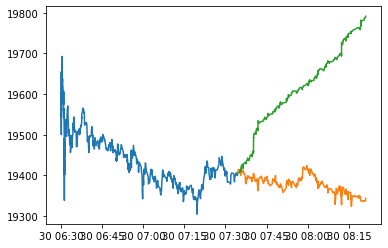

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

df = pd.read_csv('test3.csv')
df.columns = ["Date", "Close", "Volumen",]
df['Date'] = pd.to_datetime(df['Date'], unit='s')
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
data = df.sort_index(ascending=True, axis=0)

train = data[:1500]
valid = data[1500:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=499)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])